<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/ZTM_ML_%26_DS_Bootcamp_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/ZTM/car-sales.csv')

In [ ]:
data.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
#data['Price'] =data['Price'].str.replace('[\$\,\.]','',regex=True).astype(int)

def replace(s):
    s = s.replace('$','')
    s = s.replace(',','')
    s = int(s.split('.')[0])
    return s

In [ ]:
data['Price'] = data['Price'].apply(lambda x: replace(x))

In [ ]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [ ]:
data.query('Colour == "White"')

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [ ]:
pd.crosstab(data['Make'],data['Colour'])

Colour,Black,Blue,Green,Red,White
Make,,,,,
BMW,1,0,0,0,0
Honda,0,2,0,1,0
Nissan,0,0,0,0,2
Toyota,0,1,1,0,2


In [ ]:
pd.pivot_table(data,index='Make',columns='Colour',aggfunc='count')

Colour,Black,Blue,Green,Red,White
Make,,,,,
BMW,1.0,NaN,NaN,NaN,NaN
Honda,NaN,2.0,NaN,1.0,NaN
Nissan,NaN,NaN,NaN,NaN,2.0
Toyota,NaN,1.0,1.0,NaN,2.0


In [ ]:
data['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [ ]:
data.sample(frac=0.1)

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,Blue,54738,4,7000


In [ ]:
data.sample(1)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000


#sklearn

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/heart-disease.csv')

In [ ]:
y = data['target']
X= data.drop('target',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestClassifier()

In [ ]:
#model.get_params()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [ ]:
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]])

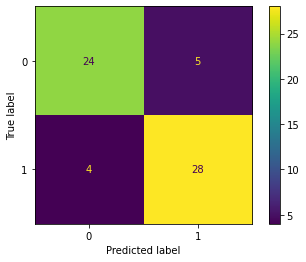

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
model.score(X_test,y_test)

0.8524590163934426

In [ ]:
(24+28)/61

0.8524590163934426

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open)

#CARS

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/car-sales-extended.csv')

In [ ]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_col = 'Make Colour Doors'.split()

In [ ]:
ct = ColumnTransformer([("onehot", OneHotEncoder(sparse=False), cat_col)],remainder='passthrough')

In [ ]:
data_trans = ct.fit_transform(data)

In [ ]:
ct.get_feature_names_out()

array(['onehot__Make_BMW', 'onehot__Make_Honda', 'onehot__Make_Nissan',
       'onehot__Make_Toyota', 'onehot__Colour_Black',
       'onehot__Colour_Blue', 'onehot__Colour_Green',
       'onehot__Colour_Red', 'onehot__Colour_White', 'onehot__Doors_3',
       'onehot__Doors_4', 'onehot__Doors_5', 'remainder__Odometer (KM)',
       'remainder__Price'], dtype=object)

In [ ]:
data_ohe = pd.DataFrame(data_trans,columns=ct.get_feature_names_out())

In [ ]:
y= data_ohe['remainder__Price']
X = data_ohe.drop('remainder__Price',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

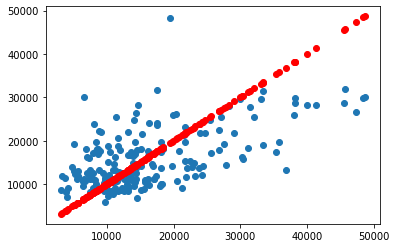

In [ ]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test,color='r')

In [ ]:
model.score(X_test,y_test)

0.3203639563980777

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/car-sales-extended-missing-data.csv')

In [ ]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
data[data.isna().any(axis=1)]

,Make,Colour,Odometer (KM),Doors,Price
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
13,NaN,White,134181.0,4.0,11121.0
20,Toyota,NaN,124844.0,4.0,24130.0
21,Honda,NaN,30615.0,4.0,29653.0
...,...,...,...,...,...
974,NaN,White,155383.0,4.0,14345.0
975,Honda,NaN,22409.0,4.0,10429.0
983,Toyota,Red,NaN,4.0,14671.0
985,NaN,Blue,216250.0,4.0,9691.0


In [ ]:
cat_imp = SimpleImputer(strategy = 'constant',fill_value="Missing")

In [ ]:
door_imp = SimpleImputer(strategy = 'constant',fill_value=4)
num_imp = SimpleImputer(strategy = 'mean')

In [ ]:
pd.DataFrame(imputer.fit_transform(data))

,0,1,2,3,4
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,Missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
ct = ColumnTransformer([
                        ("cat_imp", cat_imp, ['Make','Colour']),
                        ("door_imp", door_imp, ['Doors']),
                        ("num_imp", num_imp, ['Odometer (KM)'])
                        ],
                        remainder='passthrough')

In [ ]:
pd.DataFrame(ct.fit_transform(data))

,0,1,2,3,4
0,Honda,White,4.0,35431.0,15323.0
1,BMW,Blue,5.0,192714.0,19943.0
2,Honda,White,4.0,84714.0,28343.0
3,Toyota,White,4.0,154365.0,13434.0
4,Nissan,Blue,3.0,181577.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,4.0,35820.0,32042.0
996,Missing,White,3.0,155144.0,5716.0
997,Nissan,Blue,4.0,66604.0,31570.0
998,Honda,White,4.0,215883.0,4001.0


#california

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
X =pd.DataFrame(housing.data,columns=housing.feature_names)
y = pd.DataFrame(housing.target,columns=housing.target_names)

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import BayesianRidge,HuberRegressor,Ridge, LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
models = {
   # 'SVR':SVR(),
   # 'XGBRegressor':XGBRegressor(),
    #'Ridge':Ridge(),
    #'ElasticNet':ElasticNet(),
   # 'SGDRegressor':SGDRegressor(),
  #  'BayesianRidge':BayesianRidge(),
   # 'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    #'RANSA': RANSACRegressor(),
    #'Lasso':Lasso(),
    #'GradientBoostingRegressor':GradientBoostingRegressor()    
}

In [ ]:
model_results = []
model_names = []

for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=True)
    
print(df_results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


                   Model      RMSE
0  RandomForestRegressor  0.505291


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


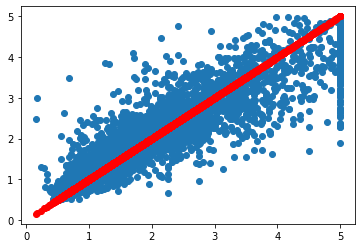

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test,color='r')

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,y_pred)

0.3284248982800389

In [ ]:
model.score(X_test,y_test)

0.804694171203235

#HEART

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ZTM/heart-disease.csv')

In [5]:
y=data['target']
X=data.drop('target',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(max_iter=10000),
          'SVC': SVC(max_iter=10000),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB(),
         }

In [7]:
score = []
x=0
#results = pd.DataFrame(y_test)
for name,model in models.items():
    x+=1
    #model.fit(X,y)
   # y_pred = model.predict(X_test)
    cvs = cross_val_score(estimator= model,X= X,y=y,cv=10)
    acc = cvs.mean()
    std = cvs.std()
    #score.append([name,accuracy_score(y_test,y_pred)])
    print(x,'/',len(models),name,round(acc,3),round(std,3))
    score.append([name,acc, std])
    #results[name] = y_pred
score = pd.DataFrame(score, columns=['model name', 'Accuracy','std'])
score.sort_values('Accuracy',ascending=False)

1 / 7 KNeighborsClassifier 0.654 0.081
2 / 7 LogisticRegression 0.818 0.062
3 / 7 SVC 0.66 0.082
4 / 7 DecisionTreeClassifier 0.778 0.061
5 / 7 RandomForestClassifier 0.841 0.056
6 / 7 AdaBoostClassifier 0.811 0.074
7 / 7 GaussianNB 0.805 0.066


,model name,Accuracy,std
4,RandomForestClassifier,0.841183,0.056040
1,LogisticRegression,0.818280,0.062282
5,AdaBoostClassifier,0.811290,0.073839
6,GaussianNB,0.805054,0.066146
3,DecisionTreeClassifier,0.778280,0.061167
2,SVC,0.660430,0.081649
0,KNeighborsClassifier,0.653548,0.080837


In [8]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)

0.8688524590163934

In [11]:
np.mean(y_test == y_pred)

0.8688524590163934

In [14]:
#model.predict_proba(X_test)

In [13]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(model,X,y,cv=5).mean()

0.821639344262295

In [19]:
cross_val_score(model,X,y,cv=5,).std()

0.04449255361498211

In [21]:
#ROC AUC

In [22]:
#tpr vs fpr

In [23]:
from sklearn.metrics import roc_curve

In [24]:
y_probs = model.predict_proba(X_test)

In [27]:
y_probs[:5]

array([[0.9 , 0.1 ],
       [0.51, 0.49],
       [0.45, 0.55],
       [0.79, 0.21],
       [0.15, 0.85]])

In [28]:
y_probs_positive = y_probs[:,1]

In [29]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [36]:
def plot_roc_curve(fpr,tpr):

    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='black',marker='--')

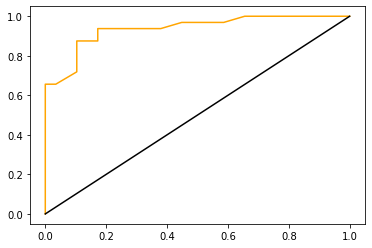

In [34]:
plot_roc_curve(fpr,tpr)

In [37]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_test,y_probs_positive)

0.9364224137931034

In [40]:
fpr,tpr,thresholds = roc_curve(y_test,y_test)

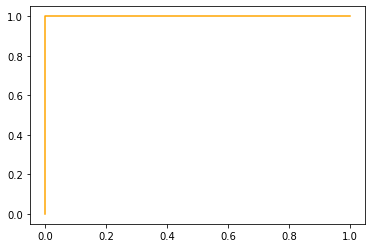

In [42]:
plt.plot(fpr,tpr,color='orange',label='ROC')

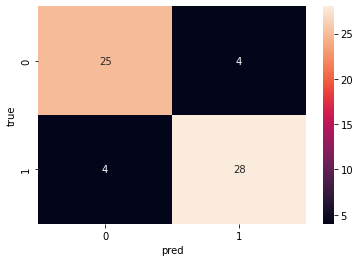

In [48]:
sns.heatmap(pd.crosstab(y_test,y_pred,rownames=['true'],colnames=['pred']),annot=True)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

